## Project 3: House Sales in King County, USA (Predict house price using linear regression)

In [1]:
#Columns details:
#id- a notation for a house
#date- Date house was sold
#price- Price is prediction target
#bedrooms- Number of Bedrooms/House
#bathrooms- Number of bathrooms/bedrooms
#sqft_living- square footage of the home
#sqft_lot- square footage of the lot
#floors- Total floors (levels) in house
#waterfront- House which has a view to a waterfront
#view- Has been viewed
#condition- How good the condition is ( Overall )
#grade- overall grade given to the housing unit, based on King County grading system
#sqft_above- square footage of house apart from basement
#sqft_basement- square footage of the basement
#yr_built- Built Year
#yr_renovated- Year when house was renovated
#zipcode- zip
#lat- Latitude coordinate
#long- Longitude coordinate
#sqft_living15- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
#sqft_lot15- lotSize area in 2015(implies-- some renovations)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## Data loading & Initial Check

In [3]:
df=pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Checking for missing values

In [5]:
 np.count_nonzero(df.isnull())

0

No missing values found

## Deleting ID & date columns

In [6]:
df=df.drop(['id','date'],axis=1)
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Correlation matrix - heatmap

In [7]:
df.shape #(rows,columns)

(21613, 19)

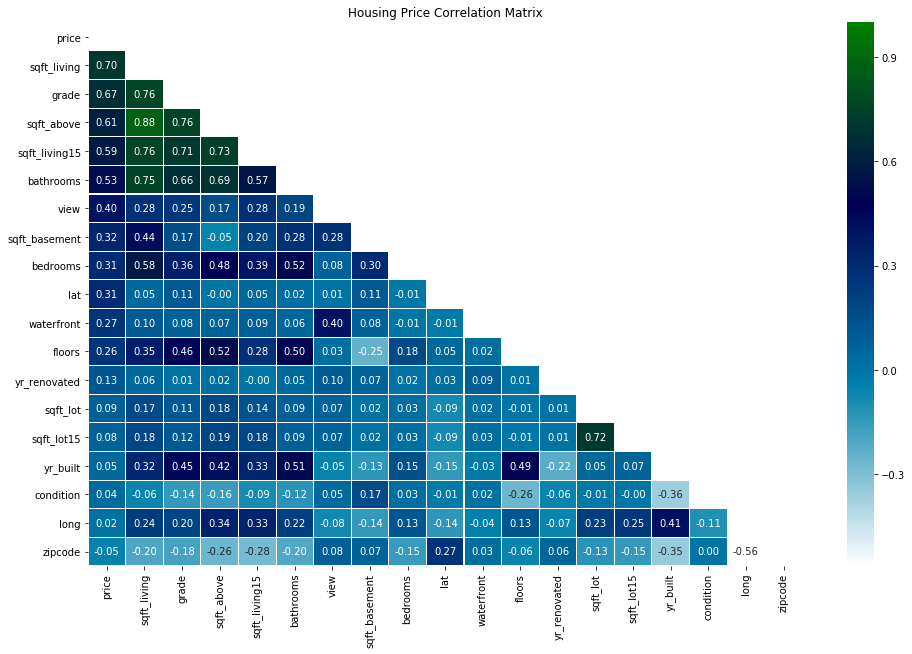

In [8]:
corrmat = df.corr()
sort = corrmat.nlargest(19,'price')['price'].index #Total no. of column (19) is plotted since correlation matrix as first cut is required for all data
cmx = np.corrcoef(df[sort].values.T)

mask = np.zeros_like(cmx, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 10))
plt.title('Housing Price Correlation Matrix',fontsize=12)
sns.heatmap(cmx,mask=mask, cbar=True,linewidths=0.05,vmax=1.0,annot=True, fmt=".2f",cmap="ocean_r",yticklabels=sort.values, xticklabels=sort.values)
plt.show()

Sqft living, grade, sft_above,sqft_living15 & bathrooms have strong correlation against price comparitively (yet to categorise data for better clarification)

## Visualizing highest correlation pair

C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


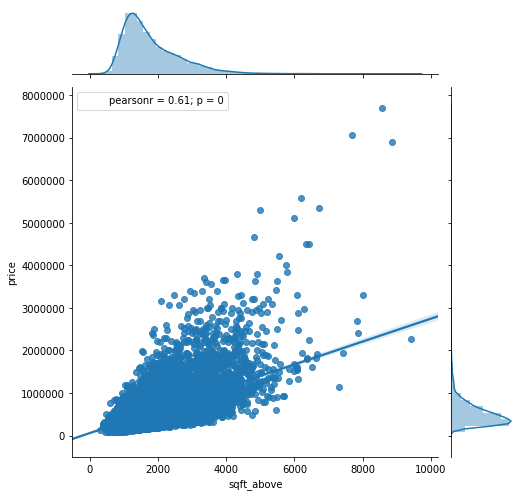

In [9]:
sns.jointplot(x="sqft_above", y="price", data=df, kind = 'reg', size = 7)
plt.show()

sqft_living distribution is skewed to the right

C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


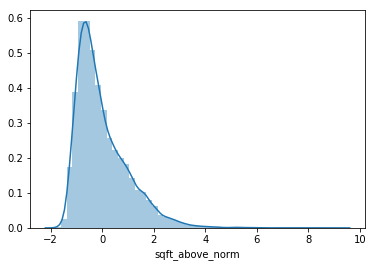

In [10]:
df['sqft_above_norm'] = (df['sqft_above']-df['sqft_above'].mean())/df['sqft_above'].std()
sns.distplot(df['sqft_above_norm'])

C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\saraswathy\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


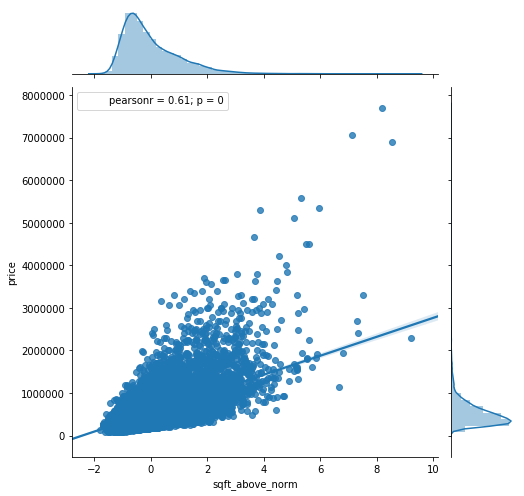

In [11]:
sns.jointplot(x="sqft_above_norm", y="price", data=df, kind = 'reg', size = 7)
plt.show()

Normalising the data doesn't impact on correlation value as it is same (0.61) on both the cases [as defined in correlation properties].It is just useful to improve our gradiet search.

# Linear Regression model
A simple linear regression model is given by 'Y=mX+b'
where m is the slope and b is the y-intercept. Y is the dependent variable and X is the explanatory variable.
Linear Regression is a class of techniques for fitting a straight line to a set of data points.

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Train & Test data set
Splitting the dataset into 80/20 ratio. 80% belongs to training and 20% belongs to test

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_above_norm'],
      dtype='object')

In [14]:
#Linear Regression without modifying the dataset
X = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
         'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']] #Predictor (independants)
Y =df['price'] #Response (dependant)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print (X_train.shape,Y_train.shape)
print (X_test.shape,Y_test.shape)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)
print('Intercept,b:',np.round(lm.intercept_,2))
print('Rsq: ', np.round(r2_score(Y_test, Y_pred),2))
print('test score:',np.round(model.score(X_test,Y_test),2))
print('train score:',np.round(model.score(X_train,Y_train),2))

(17290, 18) (17290,)
(4323, 18) (4323,)
Intercept,b: 8768800.66
Rsq:  0.69
test score: 0.69
train score: 0.7


Model without much cleaning up (just by elliminating date & ID), as is, shows test & train score of 70%.

In [15]:
coeffecients = pd.DataFrame(np.round(lm.coef_,2), X.columns)
coeffecients.columns = ['coeffecients']
coeffecients

,coeffecients
bedrooms,-35347.38
bathrooms,41770.37
sqft_living,111.24
sqft_lot,0.13
floors,8470.97
waterfront,624007.08
view,53036.92
condition,24554.34
grade,93681.14
sqft_above,70.20


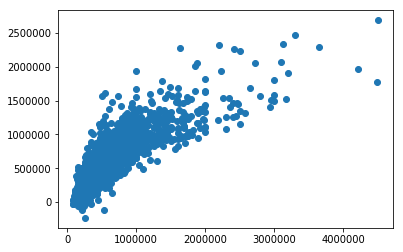

In [16]:
plt.scatter(Y_test,Y_pred)

## Data types

Categorising columns into four features,

1) Continuous numerical features
2) Discrete numerical features
3) Ordinal categorical features
4) Purely categorical features

In [17]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_above_norm'],
      dtype='object')

1) Continous numerical features

    sqft_lot
    sqft_above
    sqft_basement
    sqft_living
    sqft_living15
    sqft_lot15
    yr_built
    yr_renovated
    lat
    long
    
2) Purely categorical features

    Waterfront-unique values are 0s & 1s (0 for not present & 1 for present)
    
3) Ordinal categorical features
     
    bedrooms
    bathrooms
    floors
    view
    condition
    grade
    waterfront
    zipcode

## Adding Features for better coorrelation

In [18]:
# Establishing ways to utilise data to train the model on its occurence
df['basement_present'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0) #converting to categorical to check how it impacts price
df['renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)#converting to categorical to check how it impacts price

In [19]:
col=['basement_present','renovated']
for i in col:
    mean_price = np.round((pd.pivot_table(data=df,
                     index=i, 
                     #columns='item', 
                     values=['price'], 
                     aggfunc=np.mean)),0)
    print(mean_price)

                     price
basement_present          
0                 486884.0
1                 622374.0
              price
renovated          
0          530361.0
1          760379.0


In [20]:
np.round((pd.pivot_table(data=df,
                     index=['basement_present','renovated'], 
                     #columns='item', 
                     values=['price'], 
                     aggfunc=np.mean)),0)

price
basement_present renovated          
0                0          483767.0
                 1          574497.0
1                0          603963.0
                 1          941443.0

Average house price is high in the presence of basement & renovation individually and combinely, making it a better feature to train the model.

In [21]:
#Creating dummy variables for categorical features
#Initially created for all categorical features in which model resulted in unrealistic Adjusted Rsq value due to overfitting.
#Hence reduced to selective categorical features as listed below.
categorical_features = ['floors', 'view', 'condition', 'grade']
for i in categorical_features:
    dummies = pd.get_dummies(df[i], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(i))
    df.drop(i, axis=1, inplace=True)
    df = df.join(dummies)

In [22]:
df['pricepersqft']=df['price']/df['sqft_living'] #generally price of the housing will be presented w.r.t sqft, tried to establish the same

In [23]:
df=df.join(df.groupby(['zipcode'])['pricepersqft'].mean(),on='zipcode',rsuffix='priceavg') #establishing impact of house area on pricepersqft 
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade#6,grade#7,grade#8,grade#9,grade#10,grade#11,grade#12,grade#13,pricepersqft,pricepersqftpriceavg
0,221900.0,3,1.00,1180,5650,0,1180,0,1955,0,...,0,1,0,0,0,0,0,0,188.050847,189.172528
1,538000.0,3,2.25,2570,7242,0,2170,400,1951,1991,...,0,1,0,0,0,0,0,0,209.338521,282.471664


In [24]:
df.shape

(21613, 48)

## Multiple Regression

In [25]:
from sklearn import metrics
from scipy import linalg
from scipy import stats

In [32]:
X = df.drop(['price'], axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print (X_train.shape,Y_train.shape)
print (X_test.shape,Y_test.shape)
#fit a model
lm = linear_model.LinearRegression()
model=lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)
print('Intercept,b:',np.round(lm.intercept_,2))
print('Rsq (test score)= ', np.round(r2_score(Y_test, Y_pred),2))
print('test score:',np.round(model.score(X_test,Y_test),2))
print('train score:',np.round(model.score(X_train,Y_train),2))

(17290, 47) (17290,)
(4323, 47) (4323,)
Intercept,b: 17795583.02
Rsq (test score)=  0.9
test score: 0.9
train score: 0.91


In [27]:
#adjusted R square
def AdjustedRSquare(model,X,Y):
    YHat = model.predict(X)
    n,k = X.shape
    sse = np.sum(np.square(YHat-Y),axis=0)
    sst = np.sum(np.square(Y-np.mean(Y)),axis=0)
    R2 = 1- sse/sst
    adjR2 = R2-(1-R2)*(float(k)/(n-k-1))
    return adjR2, R2

In [33]:
lm.adjR2, lm.R2 = AdjustedRSquare(lm,X_train,Y_train)
print (np.round(lm.adjR2,2))
print(np.round(lm.R2,2))

0.9
0.91


Linear regression method is tried to train the model which resulted in 90% test & train score.However, polynomial regression can be tried in feature selection to betterment the scores.